# Predicting Chronic Kidney Disease (Machine Learning)

## Data Preparation

### Auditing

In [1]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

# import mice for numerical features
from impyute.imputation.cs import mice

# import OrdinalEncoder and KKNImputer for use with nominal variables
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# import style from matplotlib for visualization
import matplotlib.style as style

In [81]:
# read in the dataset
ckd = pd.read_csv('C:/Users/medma/Documents/MS/Capstone/data/Chronic Kidney Disease Dataset/kidney_disease.csv')

In [82]:
# view the columns
ckd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [83]:
#inspect the first five rows of data
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
for i in ckd.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [85]:
# clean up typos
for i in range(ckd.shape[0]):
    if ckd.iloc[i,25]=='ckd\t':
        ckd.iloc[i,25]='ckd'
    if ckd.iloc[i,20] in [' yes','\tyes']:
        ckd.iloc[i,20]='yes'
    if ckd.iloc[i,20]=='\tno':
        ckd.iloc[i,20]='no'
    if ckd.iloc[i,21]=='\tno':
        ckd.iloc[i,21]='no'
    if ckd.iloc[i,16]=='\t?':
        ckd.iloc[i,16]=np.nan
    if ckd.iloc[i,16]=='\t43':
        ckd.iloc[i,16]='43'
    if ckd.iloc[i,17]=='\t?':
        ckd.iloc[i,17]=np.nan
    if ckd.iloc[i,17]=='\t6200':
        ckd.iloc[i,17]= '6200'
    if ckd.iloc[i,17]=='\t8400':
        ckd.iloc[i,17]= '6200'
    if ckd.iloc[i,18]=='\t?':
        ckd.iloc[i,18]=np.nan
    if ckd.iloc[i,25]=='ckd':
        ckd.iloc[i,25]='yes'
    if ckd.iloc[i,25]=='notckd':
        ckd.iloc[i,25]='no'

In [86]:
# drop the ID column and all columns for features that will not be used
ckd = ckd[['sg','al','sc','hemo','pcv','wc','rc','htn','classification' ]]
ckd.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,yes
1,1.020,4.0,0.8,11.3,38,6000,NaN,no,yes
2,1.010,2.0,1.8,9.6,31,7500,NaN,no,yes
3,1.005,4.0,3.8,11.2,32,6700,3.9,yes,yes
4,1.010,2.0,1.4,11.6,35,7300,4.6,no,yes


In [87]:
# edit column names
cols_names={"sg":"specific_gravity",
          "al":"albumin",
          "sc":"serum_creatinine",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension"}

ckd.rename(columns=cols_names, inplace=True)
ckd.head()

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,yes
1,1.020,4.0,0.8,11.3,38,6000,NaN,no,yes
2,1.010,2.0,1.8,9.6,31,7500,NaN,no,yes
3,1.005,4.0,3.8,11.2,32,6700,3.9,yes,yes
4,1.010,2.0,1.4,11.6,35,7300,4.6,no,yes


In [88]:
# check for unique values 
for i in ckd.columns:
    print(f'{i} : {ckd[i].nunique()} values')

specific_gravity : 5 values
albumin : 6 values
serum_creatinine : 84 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 48 values
hypertension : 2 values
classification : 2 values


In [89]:
# separate numerical from categorical features using a loop to isolate features with unique values greater than 7
numerical_features = []
categorical_features = []

for i in ckd.columns:
    if ckd[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [90]:
# take a look at numerical and categorical features
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['specific_gravity', 'albumin', 'hypertension', 'classification']


In [91]:
# check the number of null values in categorical features columns
ckd.loc[:,categorical_features].isnull().sum().sort_values(ascending=False)

specific_gravity    47
albumin             46
hypertension         2
classification       0
dtype: int64

In [92]:
# check the number of null values in numerical features columns
ckd.loc[:,numerical_features].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
packed_cell_volume         71
haemoglobin                52
serum_creatinine           17
dtype: int64

In [93]:
#encode categorical features with object type using OrdinalEncoder
to_encode = [feat for feat in categorical_features if ckd[feat].dtype=='object']
to_encode


['hypertension', 'classification']

In [94]:
ode = OrdinalEncoder(dtype = int)

In [95]:
# create an encode function
def encode(ckd):
    '''function to encode non-nan data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(ckd.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = ode.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    ckd.loc[ckd.notnull()] = np.squeeze(impute_ordinal)
    return ckd

#create a for loop to iterate through each column in the data
for columns in to_encode:
    encode(ckd[columns])

In [96]:
# check the hypertension and classification columns for binary values
ckd.loc[:, categorical_features].head(20)

,specific_gravity,albumin,hypertension,classification
0,1.020,1.0,1,1
1,1.020,4.0,0,1
2,1.010,2.0,0,1
3,1.005,4.0,1,1
4,1.010,2.0,0,1
5,1.015,3.0,1,1
6,1.010,0.0,0,1
7,1.015,2.0,0,1
8,1.015,3.0,1,1
9,1.020,2.0,1,1


### Exploration

In [102]:
ckd.columns

Index(['specific_gravity', 'albumin', 'serum_creatinine', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'classification'],
      dtype='object')

In [104]:
# convert ckd into a dataframe
ckd = pd.DataFrame(data=ckd, columns = ckd.columns)

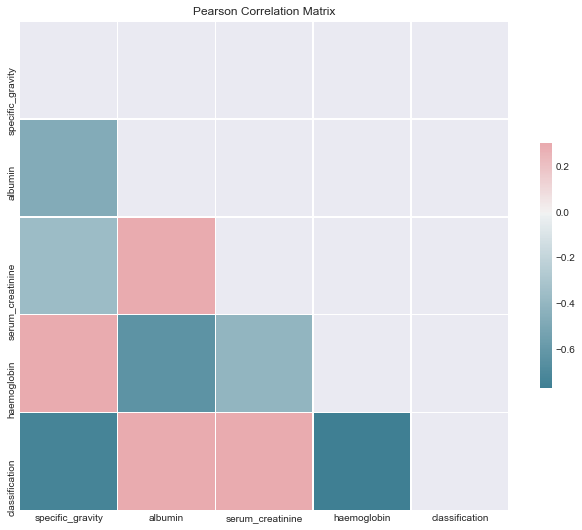

In [133]:
corr_df = ckd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix')
plt.show()

In [107]:
# check available styles
print(plt.style.available)

# set the preferred style
style.use('seaborn-deep')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


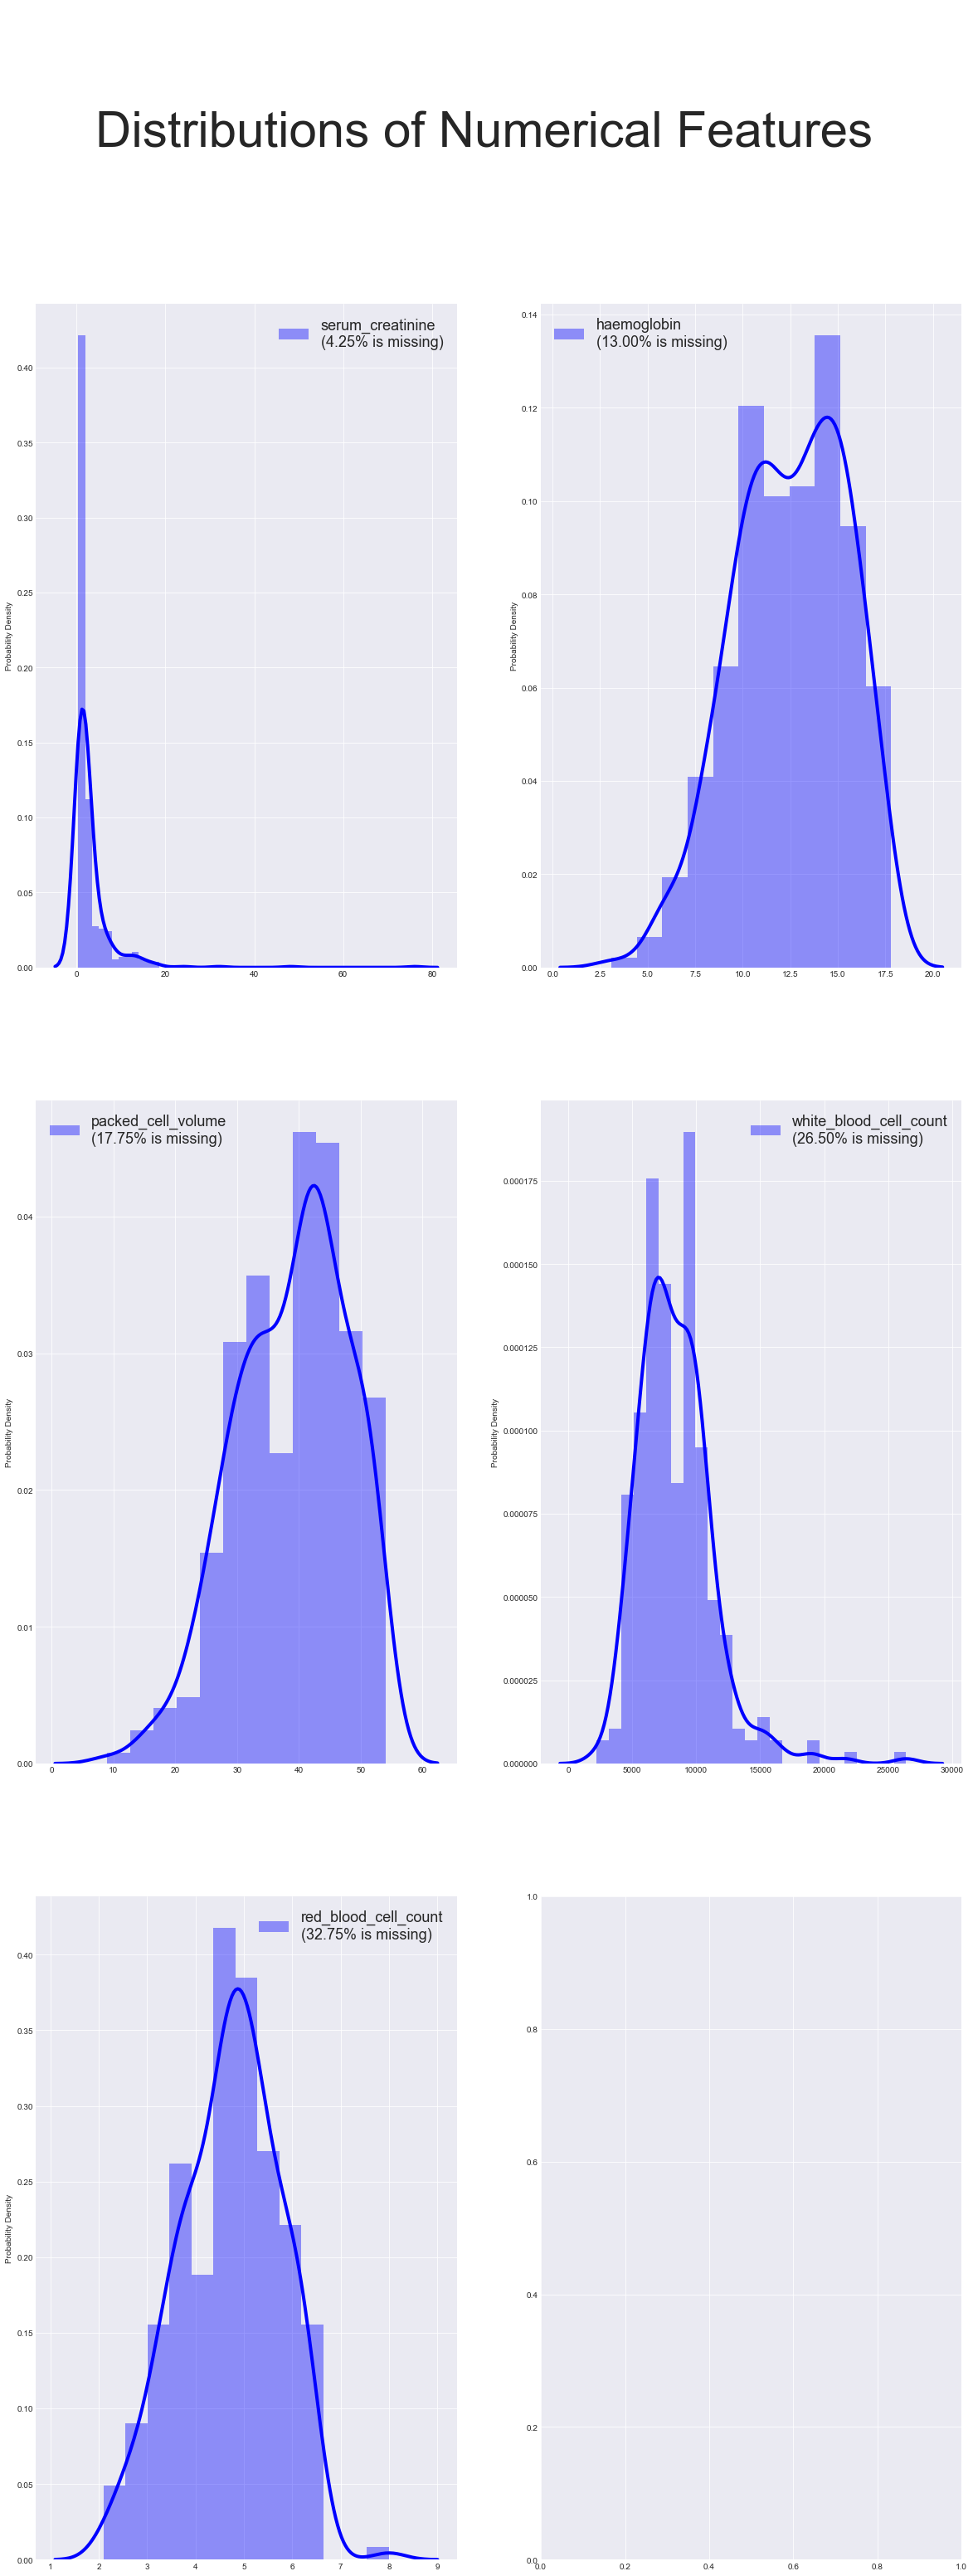

In [108]:
# create a plot for distributions of numerical features
n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numerical_features):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(ckd[column].dropna().shape[0])/ckd.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(ckd[column], color="b", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()


In [109]:
# set a new style
style.use('seaborn-darkgrid')

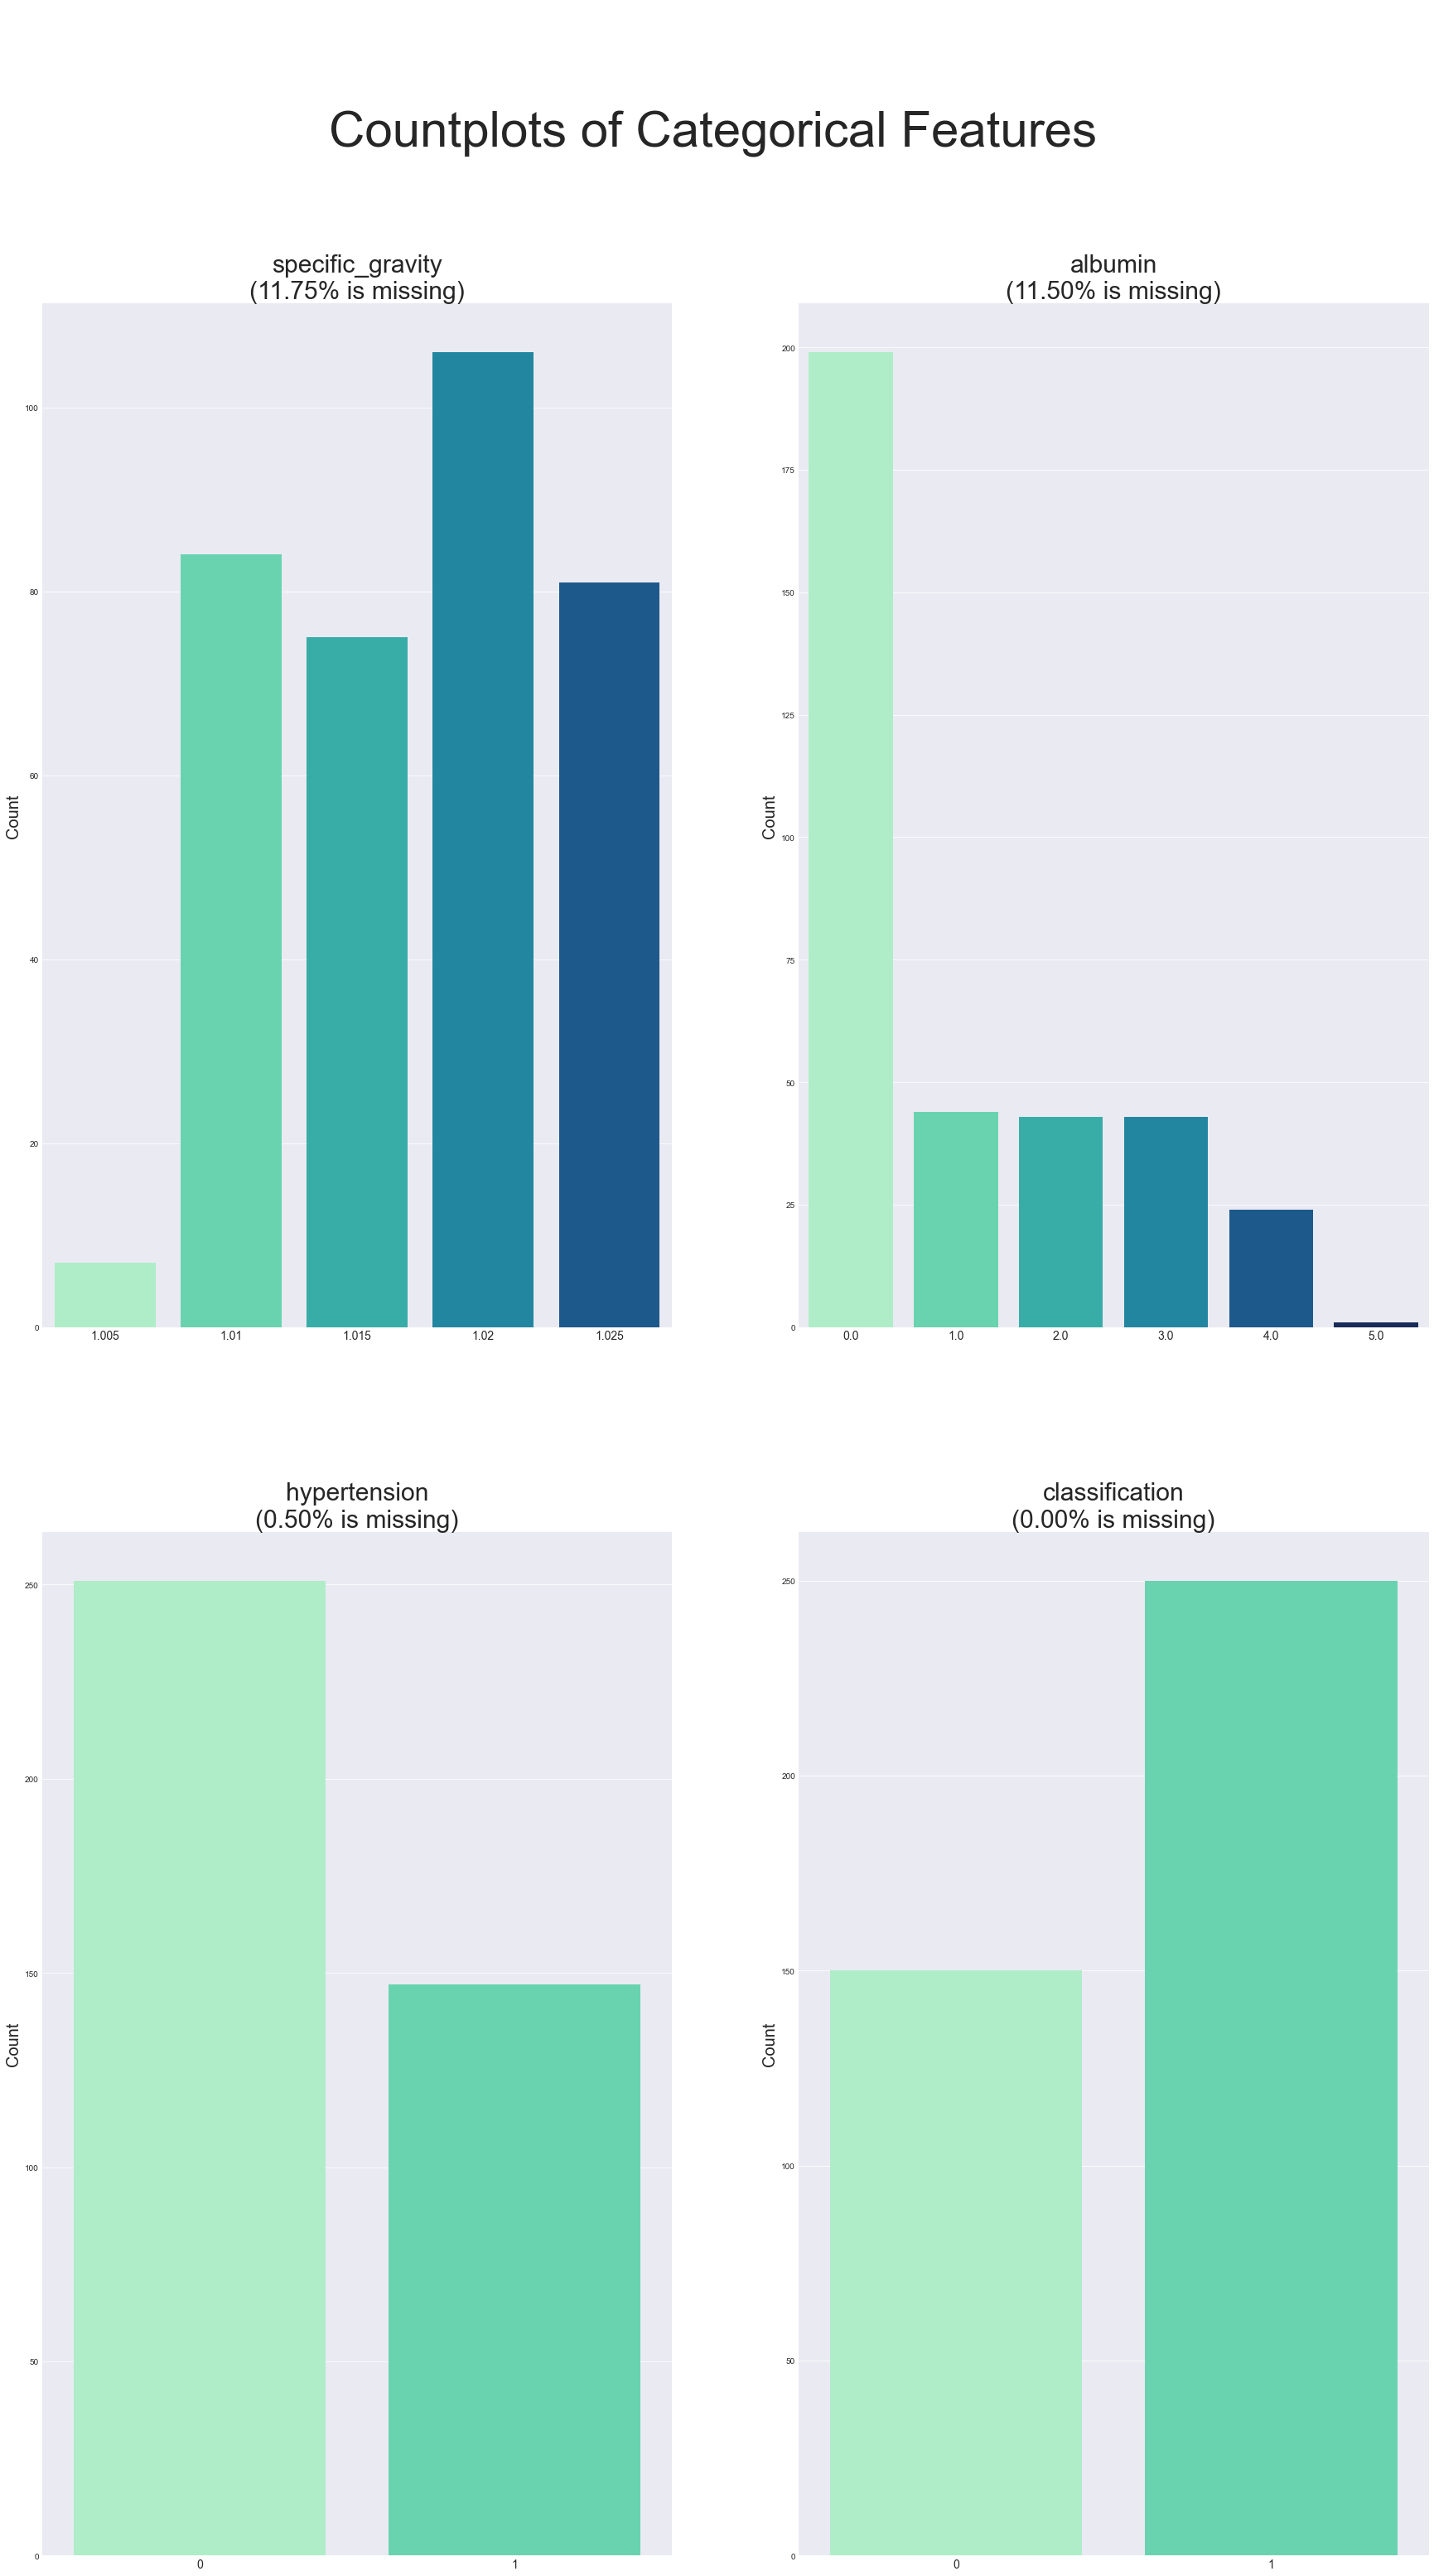

In [110]:
# create a count plot for distributions of categorical features
n_rows, n_cols = (2,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categorical_features):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(ckd[column].dropna().shape[0])/ckd.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=ckd,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=2),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=14)

plt.show()


In [111]:
# set a new style
style.use('seaborn-pastel')

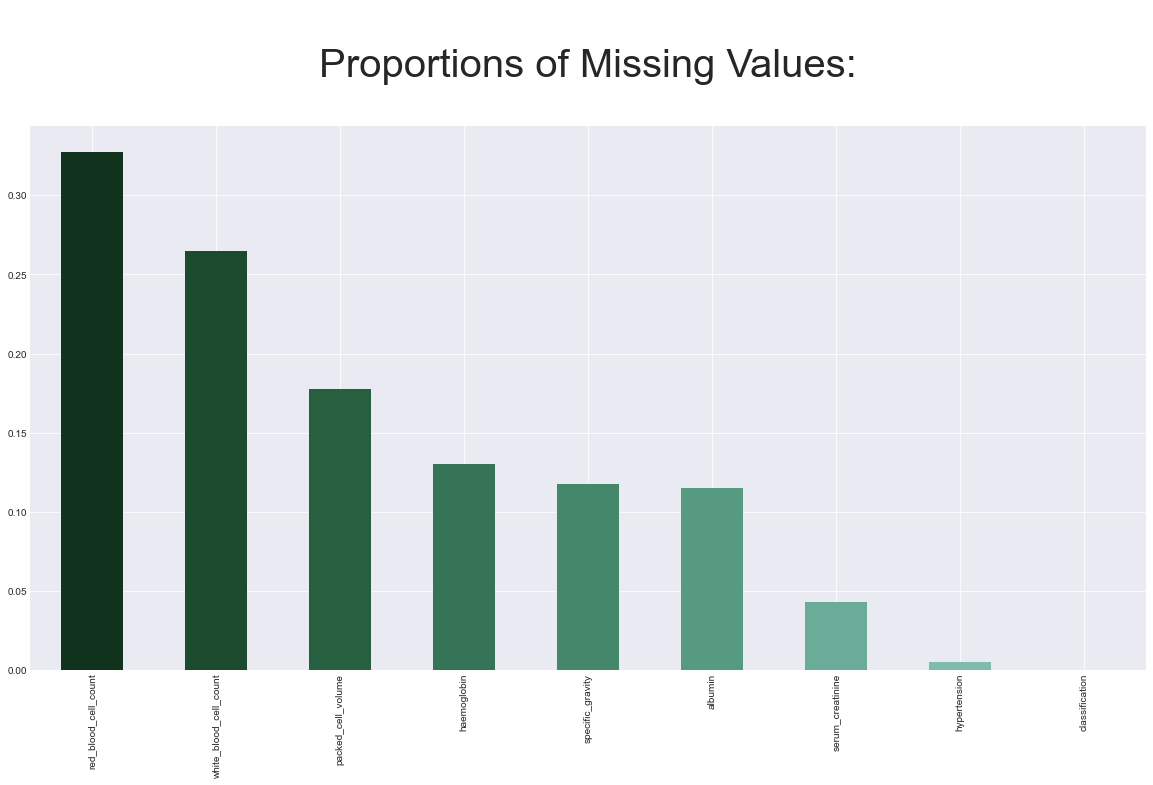

In [112]:
d=((ckd.isnull().sum()/ckd.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=12),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

### Scaling

In [113]:
# knn measures distances, so features need to be on the same scale; if not, wider spread features will be used for distance
# import the MinMaxScaler from sklearn to keep the under lying distribution and the outliers
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()
scaler.fit(ckd)
ckd_scaled = scaler.transform(ckd)

In [115]:
ckd_scaled = pd.DataFrame(data=ckd_scaled, columns = ckd.columns)

In [116]:
ckd

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,1,1
1,1.020,4.0,0.8,11.3,38,6000,NaN,0,1
2,1.010,2.0,1.8,9.6,31,7500,NaN,0,1
3,1.005,4.0,3.8,11.2,32,6700,3.9,1,1
4,1.010,2.0,1.4,11.6,35,7300,4.6,0,1
...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,6700,4.9,0,0
396,1.025,0.0,1.2,16.5,54,7800,6.2,0,0
397,1.020,0.0,0.6,15.8,49,6600,5.4,0,0
398,1.025,0.0,1.0,14.2,51,7200,5.9,0,0


In [117]:
ckd_scaled.describe()

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
count,353.000000,354.000000,383.000000,348.000000,329.000000,294.000000,269.000000,398.000000,400.000000
mean,0.620397,0.203390,0.035350,0.641254,0.664100,0.256142,0.441938,0.369347,0.625000
std,0.285831,0.270536,0.075941,0.198135,0.199780,0.121789,0.173784,0.483235,0.484729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.006614,0.489796,0.511111,0.177686,0.305085,0.000000,0.000000
50%,0.750000,0.000000,0.011905,0.649660,0.688889,0.239669,0.457627,0.000000,1.000000
75%,0.750000,0.400000,0.031746,0.809524,0.800000,0.314050,0.559322,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
ckd_scaled.head()

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
0,0.75,0.2,0.010582,0.836735,0.777778,0.231405,0.525424,1.0,1.0
1,0.75,0.8,0.005291,0.557823,0.644444,0.157025,NaN,0.0,1.0
2,0.25,0.4,0.018519,0.442177,0.488889,0.219008,NaN,0.0,1.0
3,0.00,0.8,0.044974,0.551020,0.511111,0.185950,0.305085,1.0,1.0
4,0.25,0.4,0.013228,0.578231,0.577778,0.210744,0.423729,0.0,1.0


### Imputation

#### Numerical Variables using MICE

In [119]:
# must use float values with MICE
ckd_scaled_numerical = ckd.loc[:,numerical_features].astype('float64')

# pass the numpy arrays to mice
ckd_scaled_numerical_imputed = mice(ckd_scaled_numerical.values)

In [120]:
# look at the sum of numerical NA values
ckd_scaled.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
packed_cell_volume         71
haemoglobin                52
serum_creatinine           17
dtype: int64

In [121]:
#convert the NA values into imputed values
ckd_scaled.loc[:,numerical_features] = ckd_scaled_numerical_imputed

In [122]:
# check to see if any NA values still exist
ckd_scaled.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

red_blood_cell_count      0
white_blood_cell_count    0
packed_cell_volume        0
haemoglobin               0
serum_creatinine          0
dtype: int64

In [123]:
ckd_scaled.head(20)

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
0,0.75,0.2,1.2,15.4,44.000000,7800.000000,5.200000,1.0,1.0
1,0.75,0.8,0.8,11.3,38.000000,6000.000000,4.363978,0.0,1.0
2,0.25,0.4,1.8,9.6,31.000000,7500.000000,3.784590,0.0,1.0
3,0.00,0.8,3.8,11.2,32.000000,6700.000000,3.900000,1.0,1.0
4,0.25,0.4,1.4,11.6,35.000000,7300.000000,4.600000,0.0,1.0
5,0.50,0.6,1.1,12.2,39.000000,7800.000000,4.400000,1.0,1.0
6,0.25,0.0,24.0,12.4,36.000000,7456.528513,4.242841,0.0,1.0
7,0.50,0.4,1.1,12.4,44.000000,6900.000000,5.000000,0.0,1.0
8,0.50,0.6,1.9,10.8,33.000000,9600.000000,4.000000,1.0,1.0
9,0.75,0.4,7.2,9.5,29.000000,12100.000000,3.700000,1.0,1.0


#### Nominal Variables using SimpleImputer

In [124]:
# impute the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
ckd_scaled = pd.DataFrame(data=imputer.fit_transform(ckd_scaled), columns=ckd.columns)

In [125]:
ckd_scaled.describe()

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.635625,0.180000,3.063252,12.514412,38.339483,8462.131681,4.551555,0.367500,0.625000
std,0.271701,0.262626,5.626628,2.773131,8.621413,2535.793330,0.942390,0.482728,0.484729
min,0.000000,0.000000,-0.059298,3.100000,9.000000,2200.000000,1.978106,0.000000,0.000000
25%,0.500000,0.000000,0.900000,10.800000,32.862254,6900.000000,3.900000,0.000000,0.000000
50%,0.750000,0.000000,1.350000,12.700000,39.119960,8480.701060,4.600000,0.000000,1.000000
75%,0.750000,0.400000,2.958097,14.725000,44.000000,9410.691855,5.200000,1.000000,1.000000
max,1.000000,1.000000,76.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000


In [126]:
ckd_scaled.head(20)

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,classification
0,0.75,0.2,1.2,15.4,44.000000,7800.000000,5.200000,1.0,1.0
1,0.75,0.8,0.8,11.3,38.000000,6000.000000,4.363978,0.0,1.0
2,0.25,0.4,1.8,9.6,31.000000,7500.000000,3.784590,0.0,1.0
3,0.00,0.8,3.8,11.2,32.000000,6700.000000,3.900000,1.0,1.0
4,0.25,0.4,1.4,11.6,35.000000,7300.000000,4.600000,0.0,1.0
5,0.50,0.6,1.1,12.2,39.000000,7800.000000,4.400000,1.0,1.0
6,0.25,0.0,24.0,12.4,36.000000,7456.528513,4.242841,0.0,1.0
7,0.50,0.4,1.1,12.4,44.000000,6900.000000,5.000000,0.0,1.0
8,0.50,0.6,1.9,10.8,33.000000,9600.000000,4.000000,1.0,1.0
9,0.75,0.4,7.2,9.5,29.000000,12100.000000,3.700000,1.0,1.0


In [127]:
# compare the Pearson Correlation Matrix before imputation and scaling to the matrix after imputation and scaling

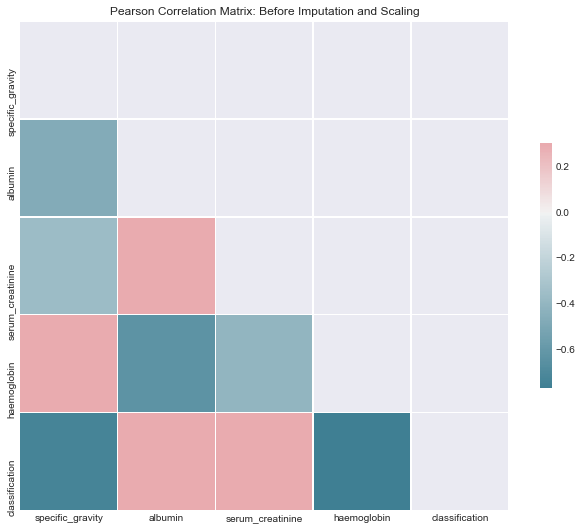

In [128]:
corr_df = ckd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix: Before Imputation and Scaling')
plt.show()

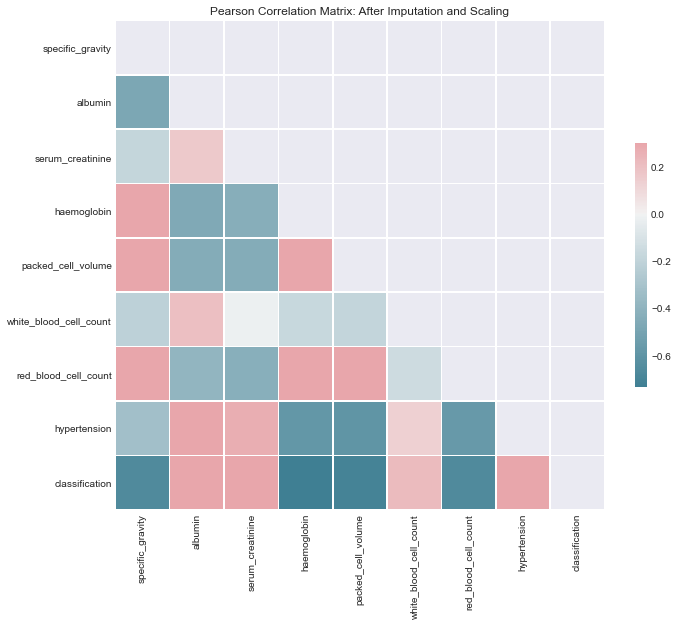

In [129]:
corr_df = ckd_scaled.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix: After Imputation and Scaling')
plt.show()

### Export prepared csv file

In [134]:
# convert ckd_scaled to a dataframe
ckd_scaled = pd.DataFrame(ckd_scaled)

#export using to_csv
ckd_scaled.to_csv('C:/Users/medma/Documents/MS/Capstone/output/kidney_disease_clean.csv', index=False)